In [1]:
#defining imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras import datasets
from keras.layers import Dense



In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#defining training and testing datasets
(x_train, y_train), (x_test,y_test) = datasets.mnist.load_data()

In [4]:
#adding 4th dimension as 1 to declare as grayscale image
#normalizing the images
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train / 255.0
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test / 255.0

In [25]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [39]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_2'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_3'),
    tf.keras.layers.Flatten(name='flatten'),
    # tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
    tf.keras.layers.Dense(10, activation='softmax', name='output')
])


In [53]:
# compile the model
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))
end_time = time.time()

2023-03-28 12:06:34.136459: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 31s 16ms/step - loss: 0.1229 - accuracy: 0.9631 - val_loss: 0.0475 - val_accuracy: 0.9856


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time - start_time)

313/313 - 1s - loss: 0.0475 - accuracy: 0.9856 - 1s/epoch - 5ms/step
Test accuracy: 0.9855999946594238
Time elapsed:  31.3660569190979


In [9]:
#saving the model
model.save('initial_model.h5')

# You can later load this saved model using the load_model function from Keras:

# from keras.models import load_model
# model = load_model('my_model.h5')


### **lets do predictions by manually inputting any random images**

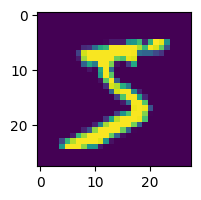

In [10]:
classes = ['zero','one','two','three','four','five','six','seven','eight','nine']

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    #plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 0)

In [20]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 5ms/step


array([[7.8748627e-08, 1.4109665e-07, 2.9053090e-06, 1.4274611e-05,
        7.7229139e-09, 5.0298985e-07, 8.5502664e-12, 9.9997628e-01,
        3.5628634e-07, 5.5117303e-06],
       [2.1454414e-04, 5.1579005e-05, 9.9714369e-01, 1.7595183e-06,
        5.5630278e-09, 1.3896116e-07, 2.5295224e-03, 2.0554154e-09,
        5.8702124e-05, 3.1027647e-09],
       [9.1059310e-06, 9.9656880e-01, 2.5633635e-04, 1.1577804e-05,
        1.5844750e-03, 3.5106241e-05, 2.3621376e-05, 3.7787101e-04,
        1.1284115e-03, 4.5667662e-06],
       [9.9982446e-01, 1.7892258e-08, 6.2368192e-05, 1.9826250e-07,
        2.9581550e-08, 1.0001057e-06, 2.0036383e-05, 3.7694147e-07,
        7.5323580e-05, 1.6240416e-05],
       [1.7639816e-06, 4.1234230e-07, 1.9173294e-06, 6.8180356e-07,
        9.9918038e-01, 1.1276387e-06, 3.9015649e-06, 3.1501995e-06,
        7.4849842e-05, 7.3181005e-04]], dtype=float32)

In [12]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

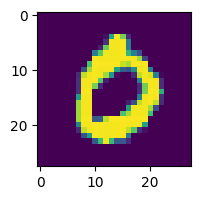

In [21]:
#plotting the dataset in that index of testing data
plot_sample(x_test, y_test,3)

In [14]:
#predicting class of the image
classes[y_classes[3]]

'zero'

### **Now, we are going to make a new model where only DENSE layer is trainable. The remaining layers would be used as trained in the earlier model**

In [40]:
#deleting the last(DENSE) layer of the previously trained model
model.pop()

#turning off training in the remaining layers of the model
model.trainable = False
model.summary()

#adding a new DENSE layer
model.add(Dense(units = 26, activation = 'softmax', trainable = True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
Total params: 18,816
Trainable params: 0
Non-trainable params: 18,816
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)          

In [16]:
# %pip install emnist
import emnist
from emnist import extract_training_samples
from emnist import extract_test_samples



In [17]:
emnist.list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [27]:
#using EMNIST (Extended MNIST) dataset
train_img,train_labels = extract_training_samples('letters')
test_img,test_labels = extract_test_samples('letters')

train_labels=train_labels-1
test_labels=test_labels-1

In [28]:
set(test_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25}

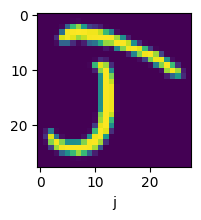

In [32]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel('abcdefghijklmnopqrstuvwxyz'[y[index]])


plot_sample(train_img,train_labels,10)

In [54]:
# Train the model and display the activations after each epoch
start_time = time.time()
history = model.fit(train_img, train_labels, epochs=10, validation_data=(test_img, test_labels))
end_time = time.time()

Epoch 1/10
3900/3900 [==============================] - 61s 16ms/step - loss: 0.5159 - accuracy: 0.8526 - val_loss: 0.3287 - val_accuracy: 0.8986
Epoch 2/10
3900/3900 [==============================] - 61s 16ms/step - loss: 0.2770 - accuracy: 0.9104 - val_loss: 0.3104 - val_accuracy: 0.9028
Epoch 3/10
3900/3900 [==============================] - 59s 15ms/step - loss: 0.2042 - accuracy: 0.9314 - val_loss: 0.3052 - val_accuracy: 0.9071
Epoch 4/10
3900/3900 [==============================] - 59s 15ms/step - loss: 0.1538 - accuracy: 0.9455 - val_loss: 0.3414 - val_accuracy: 0.9072
Epoch 5/10
3900/3900 [==============================] - 59s 15ms/step - loss: 0.1218 - accuracy: 0.9552 - val_loss: 0.3823 - val_accuracy: 0.9037
Epoch 6/10
3900/3900 [==============================] - 59s 15ms/step - loss: 0.1010 - accuracy: 0.9621 - val_loss: 0.4487 - val_accuracy: 0.9001
Epoch 7/10
3900/3900 [==============================] - 60s 15ms/step - loss: 0.0867 - accuracy: 0.9661 - val_loss: 0.4902 -

In [51]:
model.trainable=True
for layer in model.layers:
    layer.trainable=True